Analysis of Restaurant Reviews

In [1]:
# Importing Libraries
import numpy as np  
import pandas as pd 
  
# Import dataset
dataset = pd.read_csv('/content/Restaurant_Reviews.tsv', delimiter = '\t') 

In [2]:
# library to clean data
import re 
  
# Natural Language Tool Kit
import nltk 
  
nltk.download('stopwords')
  
# to remove stopword
from nltk.corpus import stopwords
  
# for Stemming propose 
from nltk.stem.porter import PorterStemmer
  
# Initialize empty array
# to append clean text 
corpus = [] 
  
# 1000 (reviews) rows to clean
for i in range(0, 1000): 
      
    # column : "Review", row ith
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i]) 
      
    # convert all cases to lower cases
    review = review.lower() 
      
    # split to array(default delimiter is " ")
    review = review.split() 
      
    # creating PorterStemmer object to
    # take main stem of each word
    ps = PorterStemmer() 
      
    # loop for stemming each word
    # in string array at ith row    
    review = [ps.stem(word) for word in review
                if not word in set(stopwords.words('english'))] 
                  
    # rejoin all string array elements
    # to create back into a string
    review = ' '.join(review)  
      
    # append each string to create
    # array of clean text 
    corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
  
# To extract max 1500 feature.
# "max_features" is attribute to
# experiment with to get better results
cv = CountVectorizer(max_features = 1500) 
  
# X contains corpus (dependent variable)
X = cv.fit_transform(corpus).toarray() 
  
# y contains answers if review
# is positive or negative
y = dataset.iloc[:, 1].values

In [5]:
# Splitting the dataset into
# the Training set and Test set
from sklearn.model_selection import train_test_split
  
# experiment with "test_size"
# to get better results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [6]:
# Fitting Random Forest Classification
# to the Training set
from sklearn.ensemble import RandomForestClassifier
  
# n_estimators can be said as number of
# trees, experiment with n_estimators
# to get better results 
model = RandomForestClassifier(n_estimators = 501,
                            criterion = 'entropy')
                              
model.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=501,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [7]:
# Predicting the Test set results
y_pred = model.predict(X_test)
  
y_pred

array([0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0])

In [11]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
  
cm = confusion_matrix(y_test, y_pred)
  
print("Confusion Matrix:\n",cm)

Confusion Matrix:
 [[122  15]
 [ 42  71]]


In [12]:
report=classification_report(y_test, y_pred)
print("Classification Report:\n",report)

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.89      0.81       137
           1       0.83      0.63      0.71       113

    accuracy                           0.77       250
   macro avg       0.78      0.76      0.76       250
weighted avg       0.78      0.77      0.77       250



In [41]:
from sklearn.linear_model import LogisticRegression
# fit a model
lr = LogisticRegression(penalty='l2',C=0.5)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

Running the example prints the ROC AUC for the logistic regression model and the no skill classifier that only predicts 0 for all examples.

In [42]:
from sklearn.metrics import roc_auc_score
# predict probabilities
lr_probs = lr.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.871


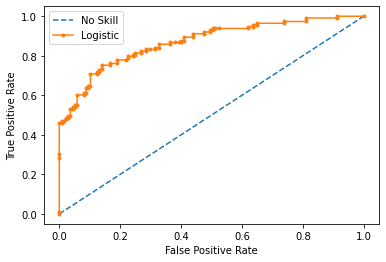

In [43]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()